# [Модуль "Pythob для аналитиков данных"](https://ru.hexlet.io/programs/python-for-data-analysts)

## [Проект: Дашборд конверсий](https://ru.hexlet.io/programs/python-for-data-analysts/projects/100)


In [451]:
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import os
import re
import requests

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Данные (образец):

[Визиты](https://drive.google.com/file/d/1QosQQ4RRNR9rkL4t7sB707h2Uy0XfYJe/view?usp=drive_link) - тысяча записей с визитами

[Регистрации](https://drive.google.com/file/d/1AeQz0kaSgz0lxYSDtuNm36muhy5fRCzZ/view?usp=drive_link) - тысяча записей о первых регистрациях


## Скачивание данных

In [26]:
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')

In [17]:
def download_from_api(url, endpoint, path_to_save, start_date=None, end_date=None):
    download_link = f'{url}/{endpoint}'
    if start_date or end_date:
        download_link += "?"
        if start_date:
            download_link += f'begin={start_date}'
        if end_date:
            download_link += f'&end={end_date}' if start_date else f'end={end_date}'
            
    print(f'Download from the link {download_link}...')
    response = requests.get(download_link)
    if response.ok:
        with open(path_to_save, 'wb') as file:
            file.write(response.content)
        print(f"File successfully saved as '{path_to_save}'")
    else:
        print(f"Error downloading file: status code {response.status_code}")

In [28]:
visits_path = './data/visits.json'
registrations_path = './data/registrations.json'

#### Скачивание данных **visits**

In [28]:
download_from_api(url=API_URL,
         endpoint='visits',
         path_to_save=visits_path,
         start_date=DATE_BEGIN,
         end_date=DATE_END)

Download from the link https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01...
File successfully saved as './data/visits.json'


#### Скачивание данных **registrations**

In [31]:
download_from_api(url=API_URL,
         endpoint='registrations',
         path_to_save=registrations_path,
         start_date=DATE_BEGIN,
         end_date=DATE_END)

Download from the link https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01...
File successfully saved as './data/registrations.json'


## Изучение датафреймов

### visits

In [32]:
visits = pd.read_json(visits_path)
visits.head(3)

,visit_id,platform,user_agent,datetime
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01 06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01 10:26:13


In [33]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263459 entries, 0 to 263458
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visit_id    263459 non-null  object        
 1   platform    263459 non-null  object        
 2   user_agent  263459 non-null  object        
 3   datetime    263459 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 8.0+ MB


In [34]:
visits.describe()

,datetime
count,263459
mean,2023-06-01 06:22:22.042044672
min,2023-03-01 00:00:43
25%,2023-04-13 19:45:03
50%,2023-06-03 12:23:27
75%,2023-07-17 22:09:08
max,2023-08-31 23:52:57


In [35]:
visits.head(3)

,visit_id,platform,user_agent,datetime
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01 06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01 10:26:13


### registrations

In [37]:
registrations = pd.read_json(registrations_path)
registrations.head(3)

,datetime,user_id,email,platform,registration_type
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple


In [38]:
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21836 entries, 0 to 21835
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           21836 non-null  datetime64[ns]
 1   user_id            21836 non-null  object        
 2   email              21836 non-null  object        
 3   platform           21836 non-null  object        
 4   registration_type  21836 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 853.1+ KB


In [39]:
registrations.describe()

,datetime
count,21836
mean,2023-05-29 10:17:02.002747904
min,2023-03-01 00:04:47
25%,2023-04-12 01:49:47.500000
50%,2023-05-26 13:22:09
75%,2023-07-15 17:26:30.500000
max,2023-08-31 23:43:26


In [40]:
registrations.head(3)

,datetime,user_id,email,platform,registration_type
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple


## Расчет метрик

* Сгруппировать данные визитов по датам и платформам
* Сгруппировать также данные регистраций по датам и платформам
* Объединить датайфреймы, сделать итоговый датафрейм с расчетом конверсии
* Сохранить датафрейм в формате JSON *conversion.json*
* Поля датафрейма:
  - date_group - сагрегированный столбец дат
  - platform - платформа (android,web,ios)
  - visits - визиты за период date_group
  - registrations - регистрации за период date_group
  - conversion - конверсия по платформе

In [114]:
path_to_save_conversions = './conversion.json'

#### Группировка данных визитов по датам и платформам

#### Подготовка данных:
* преобразование datetime -> date
* удаление дубликатов записей с одинаковым id
* удаление записей визитов ботов

In [45]:
def prepare_visits_data(visits):
    # Визиты ботов не должны влиять на расчет конверсии
    prepared_visits = visits[~visits.user_agent.str.contains('bot')].copy()
    
    # Преобразование datetime -> date
    prepared_visits['date'] = pd.to_datetime(prepared_visits.pop('datetime')).dt.date

    # Пользователи могли заходить на сайт несколько раз, прежде чем зарегистрироваться.
    # Оставить последний визит для каждого visit_id
    prepared_visits.sort_values(by=['visit_id', 'date'], ascending=[True, False], inplace=True)
    prepared_visits = prepared_visits.drop_duplicates(subset='visit_id', keep='first')
    
    prepared_visits.sort_values(by='date', inplace=True)
    return prepared_visits

In [46]:
def prepare_registrations_data(registrations):
    # Преобразование datetime -> date
    prepared_registrations = registrations.copy()
    prepared_registrations['date'] = pd.to_datetime(registrations.datetime).dt.date
    prepared_registrations.sort_values(by='date', inplace=True)
    return prepared_registrations

In [47]:
prepared_visits = prepare_visits_data(visits)
prepared_visits.head(3)

,visit_id,platform,user_agent,date
89,58b3098c-99b9-4557-a7bc-ee9f5e993811,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01
159,d698a72c-5ce4-438d-8afd-1877527e1ca8,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01
58,3480251a-dbd2-4b62-ae57-a9865c7b2cec,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01


In [59]:
prepared_registrations = prepare_registrations_data(registrations)
prepared_registrations.head(3)

,datetime,user_id,email,platform,registration_type,date
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google,2023-03-01
63,2023-03-01 04:19:11,d241b05f-38b4-4eb7-9c1a-9e1caa00d83e,ingramgina@example.net,android,google,2023-03-01
62,2023-03-01 10:07:32,b612aff6-96dc-4a1b-b82a-000accb14d02,katelyn71@example.org,android,google,2023-03-01


#### Группировка данных визитов по датам и платформам

In [61]:
grouped_visits = prepared_visits.groupby(['date','platform']).agg(visits=('visit_id', 'size')).reset_index()
grouped_visits.rename(columns={'date': 'date_group'}, inplace=True)
grouped_visits

,date_group,platform,visits
0,2023-03-01,android,75
1,2023-03-01,ios,22
2,2023-03-01,web,279
3,2023-03-02,android,67
4,2023-03-02,ios,31
...,...,...,...
547,2023-08-30,ios,66
548,2023-08-30,web,1227
549,2023-08-31,android,57
550,2023-08-31,ios,50


#### Группировка данных регистраций по датам и платформам

In [63]:
grouped_registrations = prepared_registrations.groupby(['date','platform']).agg(registrations=('user_id', 'size')).reset_index()
grouped_registrations.rename(columns={'date': 'date_group'}, inplace=True)
grouped_registrations

,date_group,platform,registrations
0,2023-03-01,android,61
1,2023-03-01,ios,18
2,2023-03-01,web,8
3,2023-03-02,android,59
4,2023-03-02,ios,24
...,...,...,...
547,2023-08-30,ios,40
548,2023-08-30,web,34
549,2023-08-31,android,42
550,2023-08-31,ios,36


#### Объединение датафреймов и рассчет конверсии

In [65]:
conversion_df = pd.merge(grouped_visits, grouped_registrations, on=['date_group', 'platform'])
conversion_df['conversion'] = conversion_df['registrations'] / conversion_df['visits']
conversion_df.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,0.813333
1,2023-03-01,ios,22,18,0.818182
2,2023-03-01,web,279,8,0.028674
3,2023-03-02,android,67,59,0.880597
4,2023-03-02,ios,31,24,0.774194


In [116]:
conversion_df.to_json(path_to_save_conversions)

## Добавление данных о рекламе

### Добавить данные по рекламным кампаниям. На выходе получить датафрейм со следующими полями:
* date_group — дата
* visits — визиты в дату
* registrations — регистрации в дату
* cost — затраты на рекламу, 0 если не было затрат
* utm_campaign — название рекламной кампании, none если не было в этот период рекламы

**Сагрегировать данные по дате и сохраним их в JSON:**

- Объединить датайфрейм конверсий с рекламными кампаниями
- Сохранить датафрейм в формате JSON с именем *ads.json*


In [391]:
path_to_save_processed_ads = './ads.json'

In [393]:
ads_view_url = 'https://drive.google.com/file/d/12vCtGhJlcK_CBcs8ES3BfEPbk6OJ45Qj/view'

In [395]:
def download_google_data(google_view_url, path_to_save):
    '''
    Downloading a file from Google Drive using a public link.
    
    Args:
        google_view_url (str): Link to Google Drive (in the format “file/d//.../view”).
        path_to_save (str): Path to save the file to disk.
    
    Returns:
        str: Path to the saved file on successful upload, otherwise None.
    '''
    resource_id_search_result = re.search(r'file/d/([^/]+)/view', google_view_url)
    if not resource_id_search_result:
        print(f"Nothing found at URL: {ads_view_url}")
        return
    
    resource_id = resource_id_search_result.group(1)
    download_url = f"https://drive.google.com/uc?id={resource_id}"
    
    response = requests.get(download_url)
    if not response.ok:
        print(f'File download error: {response.status_code}')
        return
    try:
        with open(path_to_save, 'wb') as f:
            f.write(response.content)
        print(f"File successfully saved as '{path_to_save}'")
    except Exception as e:
        print(f'Error saving file: {e}')
        return
    return path_to_save


In [397]:
ads_path = download_google_data(ads_view_url, './ads.csv')

File successfully saved as './ads.csv'


#### Чтение и изучение **ads**

In [398]:
ads_df = pd.read_csv(ads_path)
ads_df.head()

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T10:54:41,google,cpc,advanced_algorithms_series,212
1,2023-03-02T10:32:35,google,cpc,advanced_algorithms_series,252
2,2023-03-03T19:21:40,google,cpc,advanced_algorithms_series,202
3,2023-03-04T17:52:04,google,cpc,advanced_algorithms_series,223
4,2023-03-05T05:35:13,google,cpc,advanced_algorithms_series,265


In [401]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          159 non-null    object
 1   utm_source    159 non-null    object
 2   utm_medium    159 non-null    object
 3   utm_campaign  159 non-null    object
 4   cost          159 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ KB


#### Предварительная подготовка **ads**

In [403]:
def prepare_ads(ads):
    prepared_ads = ads.copy()
    prepared_ads['date'] = pd.to_datetime(ads.date).dt.date
    prepared_ads.sort_values(by='date', inplace=True)
    return prepared_ads

In [417]:
prepared_ads_df = prepare_ads(ads_df)
prepared_ads_df

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,advanced_algorithms_series,212
1,2023-03-02,google,cpc,advanced_algorithms_series,252
2,2023-03-03,google,cpc,advanced_algorithms_series,202
3,2023-03-04,google,cpc,advanced_algorithms_series,223
4,2023-03-05,google,cpc,advanced_algorithms_series,265
...,...,...,...,...,...
154,2023-09-13,vk,social,intro_to_python_course,277
155,2023-09-14,vk,social,intro_to_python_course,221
156,2023-09-15,vk,social,intro_to_python_course,175
157,2023-09-16,vk,social,intro_to_python_course,224


In [214]:
def merge_and_process(conversion_df, ads_df):
    result = conversion_df.merge(
        ads_df, left_on='date_group', right_on='date', how='left')
    result.drop(
        ['date', 'platform', 'conversion', 'utm_source', 'utm_medium'], axis=1, inplace=True)
    result['cost'] = result['cost'].fillna(0)
    result['utm_campaign'] = result['utm_campaign'].fillna('none')
    result = (
        result.groupby(['date_group', 'utm_campaign'], as_index=False)
            .agg({
                'visits': 'sum',
                'registrations': 'sum',
                'cost': 'first'
            })
    )
    result = result[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]
    return result

In [218]:
campaign_summary_df = merge_and_process(conversion_df, prepared_ads_df)
campaign_summary_df

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,376,87,212.0,advanced_algorithms_series
1,2023-03-02,613,106,252.0,advanced_algorithms_series
2,2023-03-03,683,107,202.0,advanced_algorithms_series
3,2023-03-04,647,159,223.0,advanced_algorithms_series
4,2023-03-05,707,115,265.0,advanced_algorithms_series
...,...,...,...,...,...
179,2023-08-27,795,88,222.0,intro_to_python_course
180,2023-08-28,635,83,223.0,intro_to_python_course
181,2023-08-29,1268,143,190.0,intro_to_python_course
182,2023-08-30,1328,101,109.0,intro_to_python_course


In [224]:
campaign_summary_df.to_json(path_th_save_processed_ads)

## Визуализация

In [199]:
conversion_df = pd.read_json('./conversion.json', convert_dates=['date_group'])
campaign_summary_df = pd.read_json('./ads.json', convert_dates=['date_group'])

In [201]:
dir_to_save_plots = './charts'

### Подготовка понедельных данных для визуализации

#### подготовка понедельных данных по **conversion**

In [203]:
conversion_weekly_df = conversion_df.groupby(
    [pd.Grouper(key='date_group', freq='W'), 'platform']
).agg({
    'visits': 'sum',
    'registrations': 'sum'
}).reset_index()
conversion_weekly_df['week'] = conversion_weekly_df['date_group'].dt.isocalendar().week
new_column_order = ['week', 'platform', 'visits', 'registrations']
conversion_weekly_df = conversion_weekly_df[new_column_order]
conversion_weekly_df['conversion'] = conversion_weekly_df['registrations'] / conversion_weekly_df['visits']
conversion_weekly_df.head()

,week,platform,visits,registrations,conversion
0,9,android,328,273,0.832317
1,9,ios,177,132,0.745763
2,9,web,2521,169,0.067037
3,10,android,733,522,0.712142
4,10,ios,296,214,0.722973


#### подготовка понедельных данных по **campaign**

In [461]:
def process_campaigns(campaigns):
    campaigns = list(campaigns)
    if 'none' in campaigns and len(campaigns) > 1:
        campaigns.remove('none')
    return campaigns.pop()


campaign_weekly_df = campaign_summary_df.groupby(
    [pd.Grouper(key='date_group', freq='W')]
).agg({
    'visits': 'sum',
    'registrations': 'sum',
    'cost': 'sum',
    'utm_campaign': 'unique'
}).reset_index()
campaign_weekly_df['week'] = campaign_weekly_df['date_group'].dt.isocalendar().week
new_column_order = ['week', 'visits', 'registrations', 'cost', 'utm_campaign']
campaign_weekly_df = campaign_weekly_df[new_column_order]
campaign_weekly_df['utm_campaign'] = campaign_weekly_df['utm_campaign'].apply(process_campaigns)
campaign_weekly_df.head()

,week,visits,registrations,cost,utm_campaign
0,9,3026,574,1154,advanced_algorithms_series
1,10,8615,1184,1172,advanced_algorithms_series
2,11,5215,829,498,advanced_algorithms_series
3,12,3950,664,591,virtual_reality_workshop
4,13,4958,856,1287,virtual_reality_workshop


In [273]:
def plot_column_data(df, date_column, column_name, title, xlabel='Date', save_path=None):
    """
    Plots a bar chart for the specified column in the DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data to plot.

    date_column : str
        Name of the date column to plot (e.g., 'date_group', 'week_number').

    column_name : str
        Name of the column to plot (e.g., 'visits', 'registrations', 'conversions').
    
    title : str
        Title for the chart and Y-axis label.
    
    save_path : str, optional
        Path to save the plot image. If not provided, the plot is shown interactively.
    """
    plt.figure(figsize=(12, 6))
    
    plt.bar(df[date_column],
            df[column_name],
            label=title,
            color='blue',
            edgecolor='white',
            linewidth=1)
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(column_name, fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.legend()
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved at: {os.path.realpath(save_path)}")
        
    plt.show()

In [228]:
def plot_stacked_column_by_platform(df, date_column, column_name, title, xlabel='Date', save_path=None, colors=None):
    """
    Plots a stacked bar chart for a specified column by platform.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data to plot.

    date_column : str
        Name of the date column to plot (e.g., 'date_group', 'week_number').
    
    column_name : str
        The name of the column to plot (e.g., 'visits', 'registrations', 'conversions').
    
    title : str
        Title for the chart.
    
    save_path : str, optional
        Path to save the plot image. If not provided, the plot is shown interactively.
    
    colors : dict, optional
        Dictionary for custom colors for each platform. Keys are platform names and values are color names.
        Defaults to `{"android": "blue", "ios": "red", "web": "darkgreen"}` if not provided.
    """
    df_pivot = df.pivot(
        index=date_column, columns='platform', values=column_name).reset_index()

    if colors is None:
        colors = {"android": "blue", "ios": "red", "web": "darkgreen"}

    x_labels = df_pivot[date_column]
    x_indices = range(len(x_labels))

    is_datetime = pd.api.types.is_datetime64_any_dtype(x_labels)

    ax = plt.figure(figsize=(12, 6)).gca()
    df_pivot.drop(columns=date_column).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color=[colors.get(platform, 'gray') for platform in df_pivot.columns[1:]],  # Color by platform
        edgecolor="grey",
        linewidth=1
    )
    
    ax.set_xticks(x_indices)

    if is_datetime:
        ax.set_xticklabels(x_labels.dt.strftime('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    else:
        ax.set_xticklabels(x_labels)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(column_name.capitalize(), fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Platform', fontsize=10, loc='upper right')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved at: {os.path.realpath(save_path)}")

    plt.show()


In [305]:
def plot_grouped_column_by_platform(df, date_column, column_name, title, xlabel='Date', save_path=None, colors=None):
    """
    Plots a grouped bar chart for a specified column by platform.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data to plot.
    
    date_column : str
        Name of the date column to plot (e.g., 'date_group', 'week_number').

    column_name : str
        The name of the column to plot (e.g., 'visits', 'registrations', 'conversions').
    
    title : str
        Title for the chart and Y-axis label.
    
    xlabel : str, optional
        Label for the X-axis. Defaults to 'Date'.
    
    save_path : str, optional
        Path to save the plot image. If not provided, the plot is shown interactively.
    
    colors : dict, optional
        Dictionary for custom colors for each platform. Keys are platform names and values are color names.
        Defaults to `{"android": "blue", "ios": "red", "web": "darkgreen"}` if not provided.
    """
    df_pivot = df.pivot(
        index=date_column, columns='platform', values=column_name).reset_index()
    
    if colors is None:
        colors = {"android": "blue", "ios": "red", "web": "darkgreen"}

    x_labels = df_pivot[date_column]
    if pd.api.types.is_datetime64_any_dtype(x_labels):
        x_labels = x_labels.dt.strftime('%Y-%m')
    x_indices = range(len(x_labels))

    ax = plt.figure(figsize=(12, 6)).gca()
    width = 0.2
    platforms = df_pivot.columns[1:]  # Exclude date_column
    num_platforms = len(platforms)

    for i, platform in enumerate(platforms):
        ax.bar(
            [x + (i - num_platforms / 2) * width for x in x_indices],
            df_pivot[platform],
            width=width,
            label=platform,
            color=colors.get(platform, 'gray'),
            edgecolor="grey",
            linewidth=1
        )
    
    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(column_name, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Platform', fontsize=10, loc='upper right')
    plt.yticks(fontsize=10)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved at: {os.path.realpath(save_path)}")

    plt.show()


#### Итоговые визиты

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/total_visits_daily.png


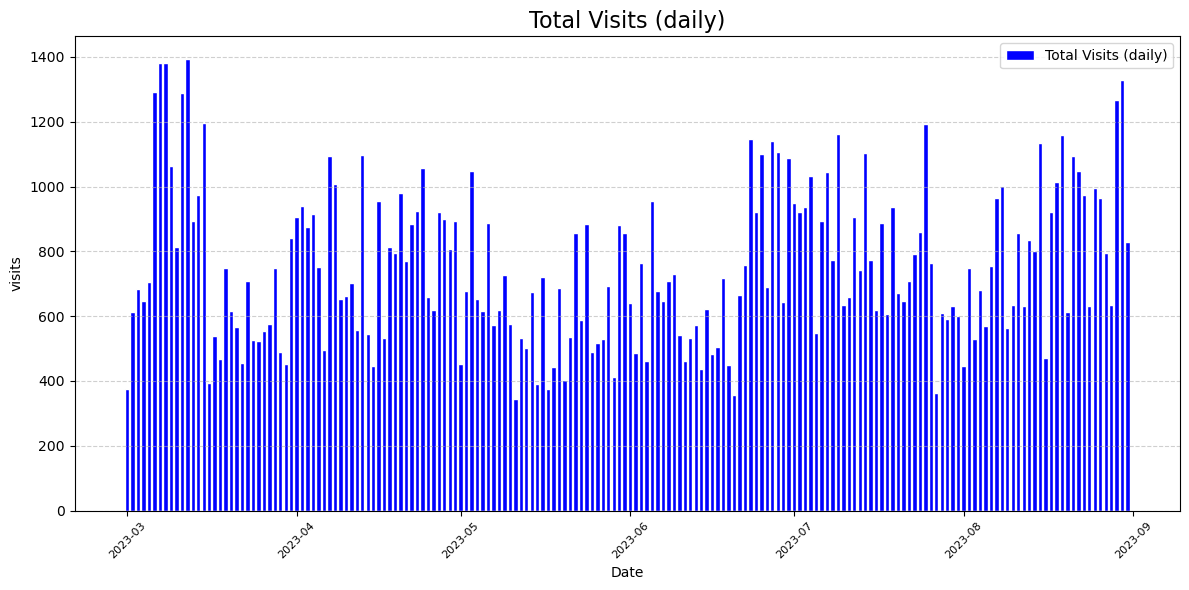

In [224]:
plot_column_data(
    campaign_summary_df,
    date_column='date_group',
    column_name='visits',
    title='Total Visits (daily)',
    xlabel='Date',
    save_path=f'{dir_to_save_plots}/total_visits_daily.png'
)

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/total_visits.png


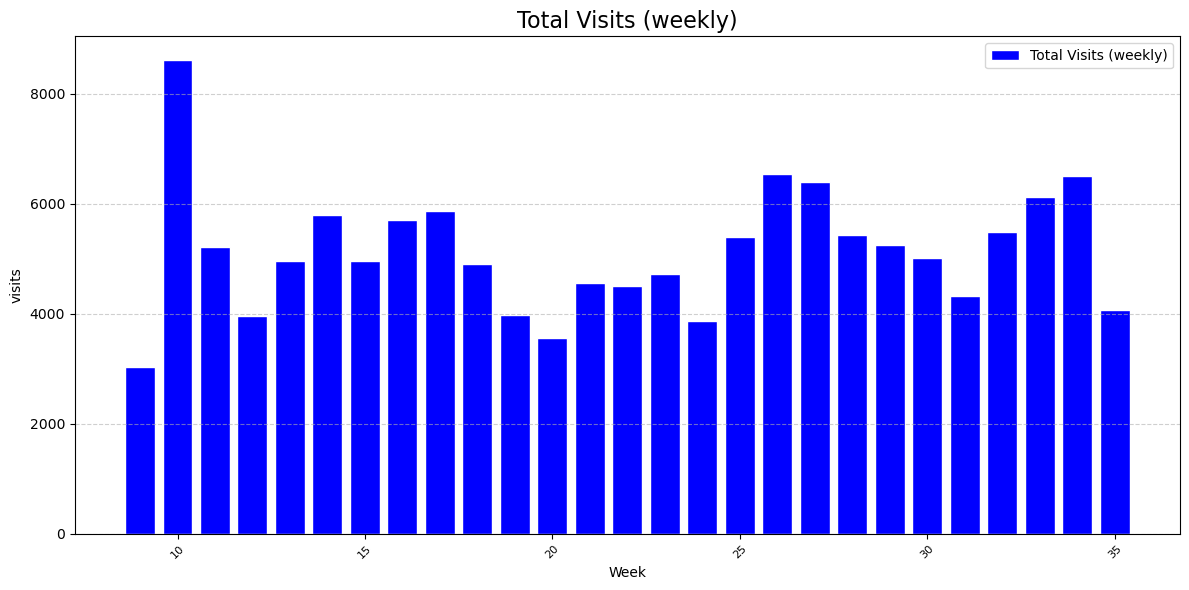

In [226]:
plot_column_data(
    campaign_weekly_df,
    date_column='week',
    column_name='visits',
    title='Total Visits (weekly)',
    xlabel='Week',
    save_path=f'{dir_to_save_plots}/total_visits.png'
)

#### Итоговые визиты с разбивкой по платформам: ***web, android, ios***

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/visits_by_platform_daily.png


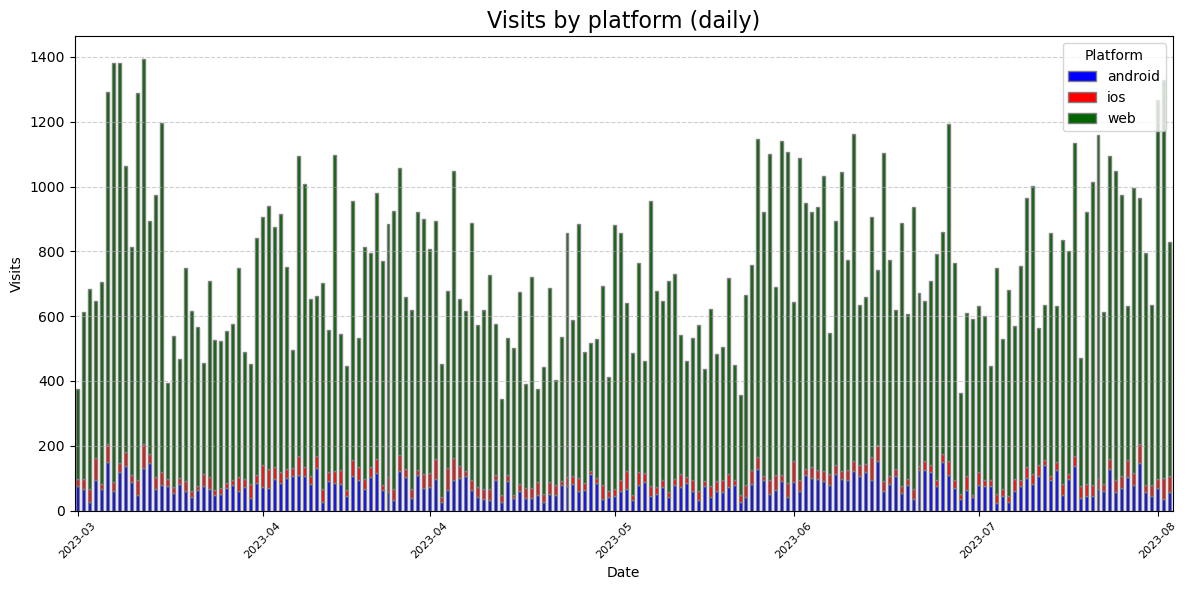

In [236]:
plot_stacked_column_by_platform(
    conversion_df,
    date_column='date_group',
    column_name='visits',
    title='Visits by platform (daily)',
    xlabel='Date',
    save_path=f'{dir_to_save_plots}/visits_by_platform_daily.png'
)

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/visits_by_platform.png


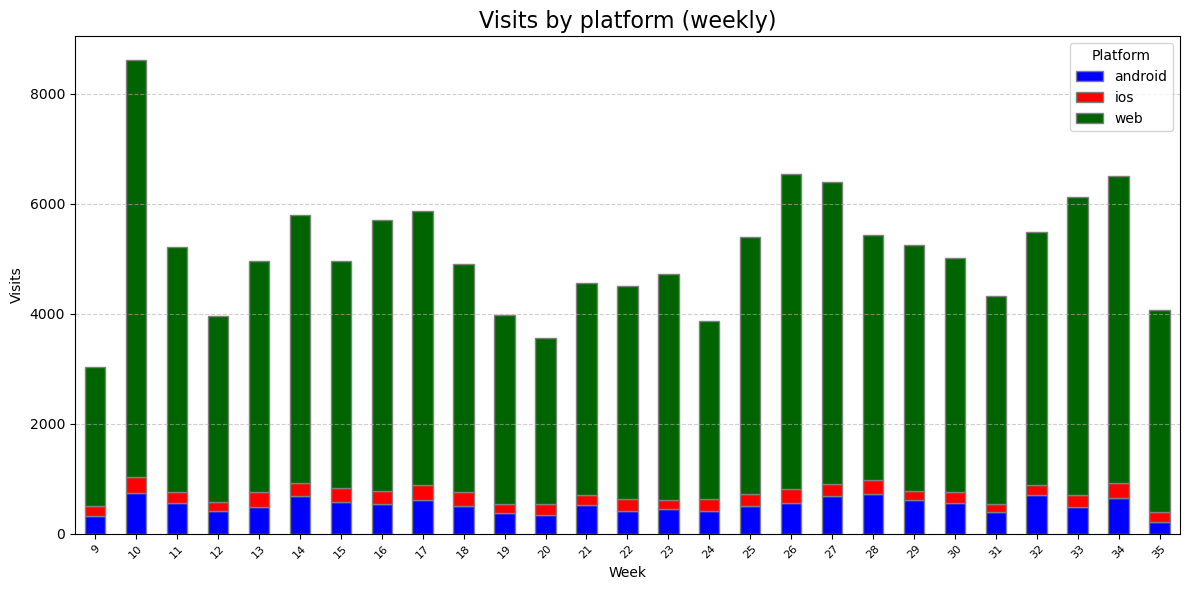

In [238]:
plot_stacked_column_by_platform(
    conversion_weekly_df,
    date_column='week',
    column_name='visits',
    title='Visits by platform (weekly)',
    xlabel='Week',
    save_path=f'{dir_to_save_plots}/visits_by_platform.png'
)

#### Итоговые регистрации

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/total_registrations_daily.png


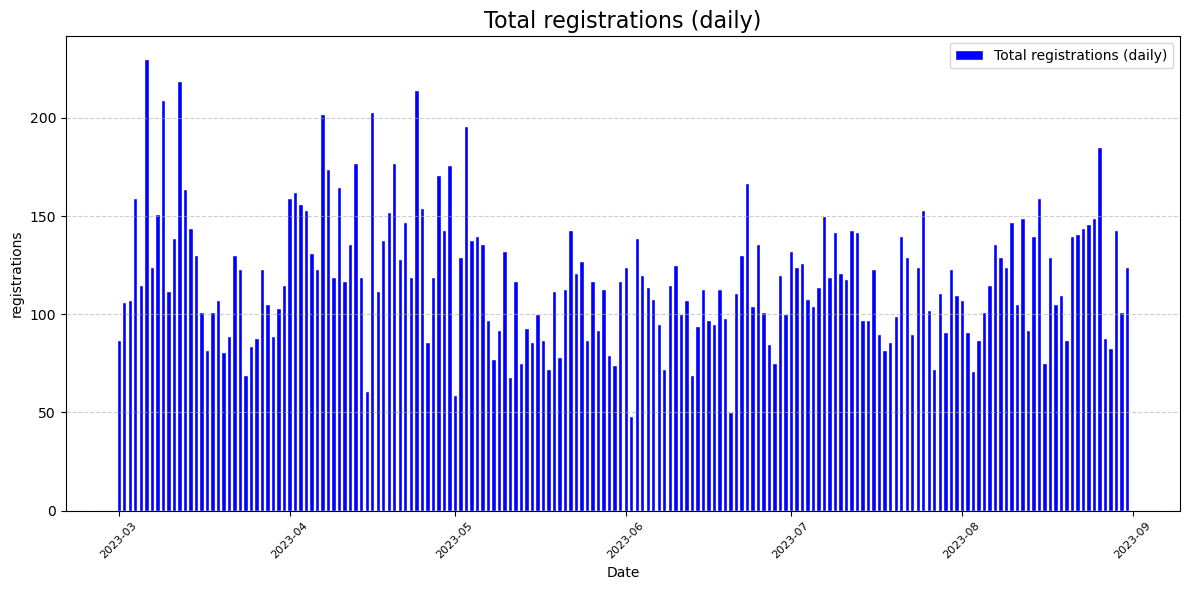

In [256]:
plot_column_data(
    campaign_summary_df,
    date_column='date_group',
    column_name='registrations',
    title='Total registrations (daily)',
    xlabel='Date',
    save_path=f'{dir_to_save_plots}/total_registrations_daily.png'
)

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/total_registrations.png


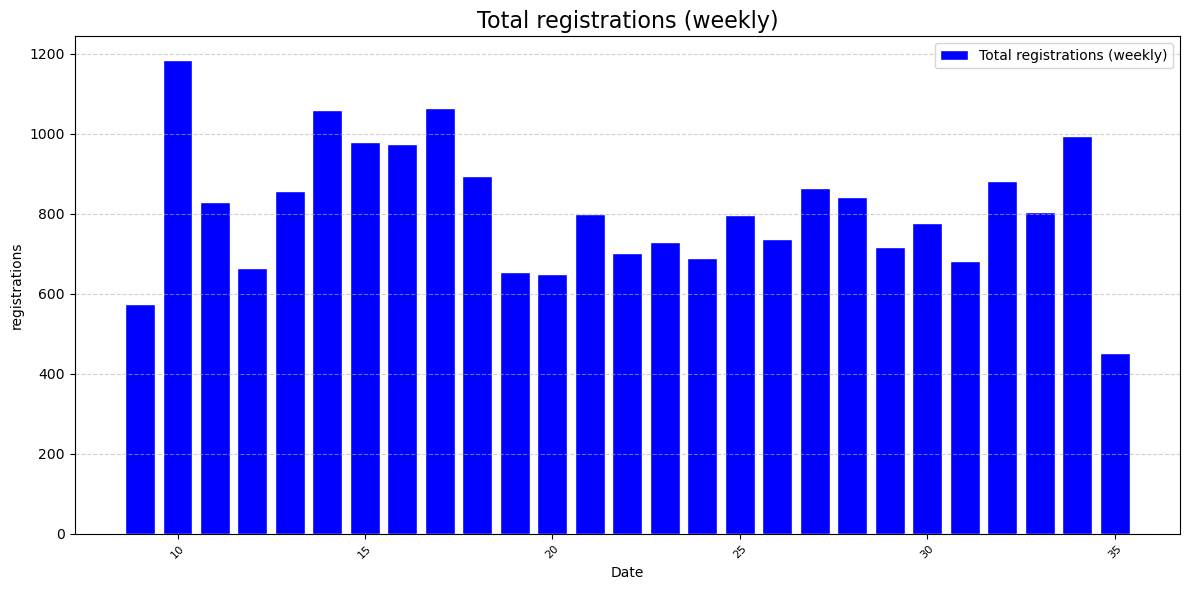

In [258]:
plot_column_data(
    campaign_weekly_df,
    date_column='week',
    column_name='registrations',
    title='Total registrations (weekly)',
    xlabel='Date',
    save_path=f'{dir_to_save_plots}/total_registrations.png'
)

#### Итоговые регистрации с разбивкой по платформам: ***web, android, ios***

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/registrations_by_platform_daily.png


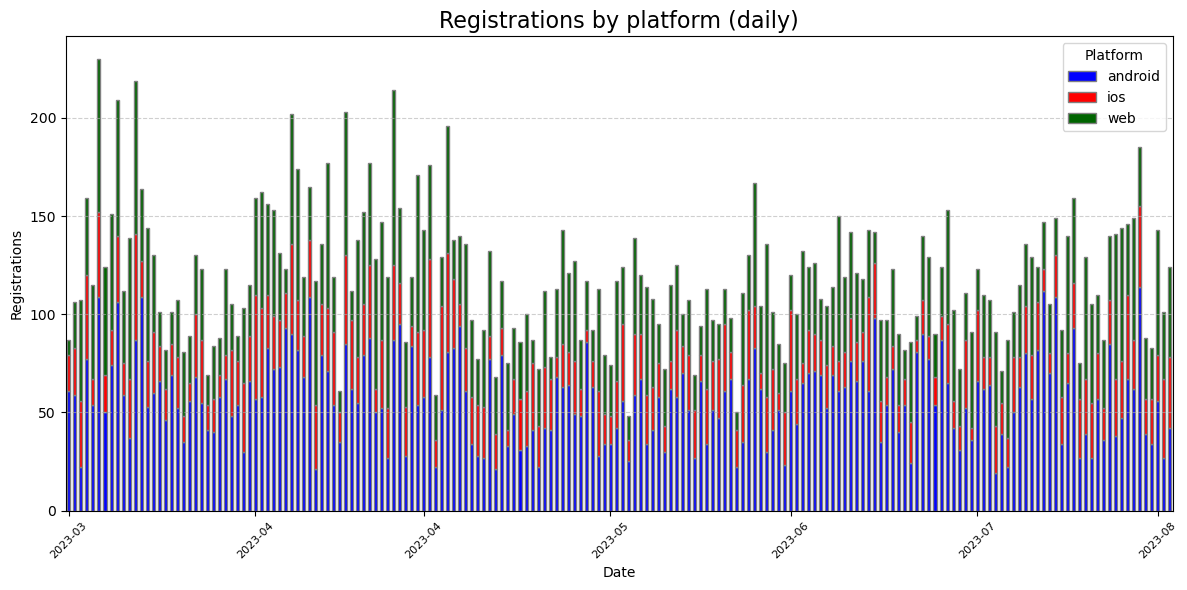

In [246]:
plot_stacked_column_by_platform(
    conversion_df,
    date_column='date_group',
    column_name='registrations',
    title='Registrations by platform (daily)',
    xlabel='Date',
    save_path=f'{dir_to_save_plots}/registrations_by_platform_daily.png'
)

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/registrations_by_platform.png


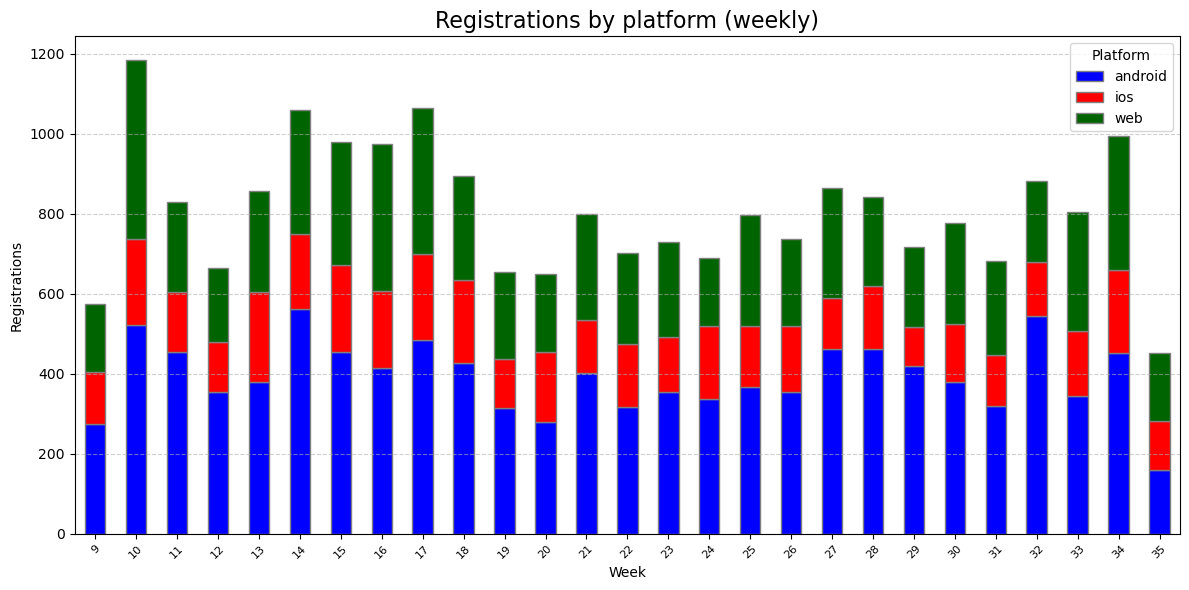

In [281]:
plot_stacked_column_by_platform(
    conversion_weekly_df,
    date_column='week',
    column_name='registrations',
    title='Registrations by platform (weekly)',
    xlabel='Week',
    save_path=f'{dir_to_save_plots}/registrations_by_platform.png'
)

#### Доля в визитах и регистрациях по типу платформы

In [52]:
conversion_df.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,0.813333
1,2023-03-01,ios,22,18,0.818182
2,2023-03-01,web,279,8,0.028674
3,2023-03-02,android,67,59,0.880597
4,2023-03-02,ios,31,24,0.774194


In [62]:
grouped_by_platform = conversion_df.groupby('platform')[['visits', 'registrations']].agg('sum').reset_index()
grouped_by_platform

,platform,visits,registrations
0,android,13972,10582
1,ios,5804,4377
2,web,118927,6877


In [156]:
from itertools import cycle
import matplotlib.pyplot as plt

def plot(df, label_column, columns, save_path=None):
    """
    Plots multiple pie charts showing the share of categories within specified columns.

    Parameters:
    df (pandas.DataFrame): The data source containing the data to plot.
    label_column (str): The name of the column containing category labels for the pie chart segments.
    columns (list of str): Names of the columns to visualize as separate pie charts.
    save_path (str, optional): Path to save the resulting figure. If None, the figure is not saved.

    Behavior:
    - Creates pie charts for each specified column, displaying proportions of the values.

    Returns:
    None. Displays the resulting charts in a grid layout.
    """

    basic_colors = ('blue', 'red', 'darkgreen')
    color_cycle = cycle(basic_colors + plt.cm.tab20.colors)
    colors = [next(color_cycle) for _ in range(len(df[label_column]))]
    
    cols_number = 2
    rows_number = (len(columns) + cols_number - 1) // cols_number  # Округляем вверх
    
    fig, axes = plt.subplots(rows_number, cols_number, figsize=(12, 6))
    fig.suptitle('Segment shares', fontsize=16, y=1.02)
    
    labels = df[label_column]
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        data = df[column]
        axes[i].pie(
            data,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=90,
            textprops={'color': 'white', 'fontsize': 9}
        )
        axes[i].set_title(column)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved at: {os.path.realpath(save_path)}")
    
    plt.tight_layout()
    plt.show()


Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/platform_shares_of_visits_registrations.png


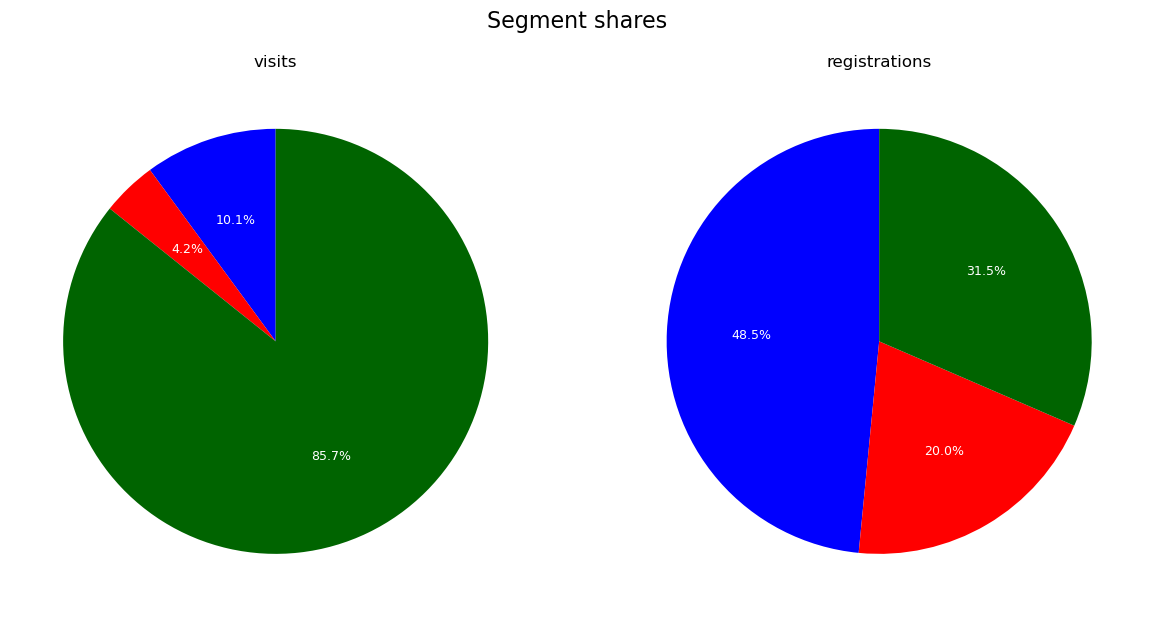

In [160]:
plot(
    grouped_by_platform,
    label_column='platform',
    columns=('visits', 'registrations'),
    save_path='./charts/platform_shares_of_visits_registrations.png'
)

#### Конверсия по каждой платформе

In [263]:
conversion_weekly_df.head()

,week,platform,visits,registrations,conversion
0,9,android,328,273,0.832317
1,9,ios,177,132,0.745763
2,9,web,2521,169,0.067037
3,10,android,733,522,0.712142
4,10,ios,296,214,0.722973


In [367]:
def plot_separately_by_platform(
    df, date_column, column_name, title, xlabel='Date', ylim=None, save_path=None, colors=None):
    """
    Plots separate line charts for each platform on individual subplots.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data to plot.
    
    date_column : str
        Name of the date column to plot (e.g., 'date_group', 'week_number').

    column_name : str
        The name of the column to plot (e.g., 'visits', 'registrations', 'conversions').
    
    title : str
        Title for the chart.

    xlabel : str, optional
        Label for the X-axis. Defaults to 'Date'.

    save_path : str, optional
        Path to save the plot image. If not provided, the plot is shown interactively.
    
    colors : dict, optional
        Dictionary for custom colors for each platform. Keys are platform names and values are color names.
        Defaults to `{"android": "blue", "ios": "red", "web": "darkgreen"}` if not provided.
    """
    df_pivot = df.pivot(index=date_column, columns='platform', values=column_name).reset_index()
   
    if colors is None:
        colors = {"android": "blue", "ios": "red", "web": "darkgreen"}
    
    x_labels = df_pivot[date_column]
    if pd.api.types.is_datetime64_any_dtype(x_labels):
        x_labels = x_labels.dt.strftime('%Y-%m')
    
    platforms = df_pivot.columns[1:]

    fig, axes = plt.subplots(len(platforms), 1, figsize=(12, 4 * len(platforms)), sharex=True)

    for i, platform in enumerate(platforms):
        ax = axes[i]
        ax.plot(
            x_labels,
            df_pivot[platform],
            label=f'{platform.capitalize()} {column_name}',
            color=colors.get(platform, 'gray'),
            marker='o',
            linestyle='-',
            linewidth=2
        )
        ax.set_title(f'{platform.capitalize()} {title}', fontsize=14)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(column_name, fontsize=10)
        if ylim is not None:
            ax.set_ylim(ylim)
        ax.set_ylim(0)
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.legend(fontsize=10)
        ax.tick_params(axis='x', labelrotation=45)
        ax.tick_params(axis='both', labelsize=10)
    
    plt.tight_layout()

    # Save or show the plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved at: {os.path.realpath(save_path)}")
    
    plt.show()


Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/conversion_by_platform.png


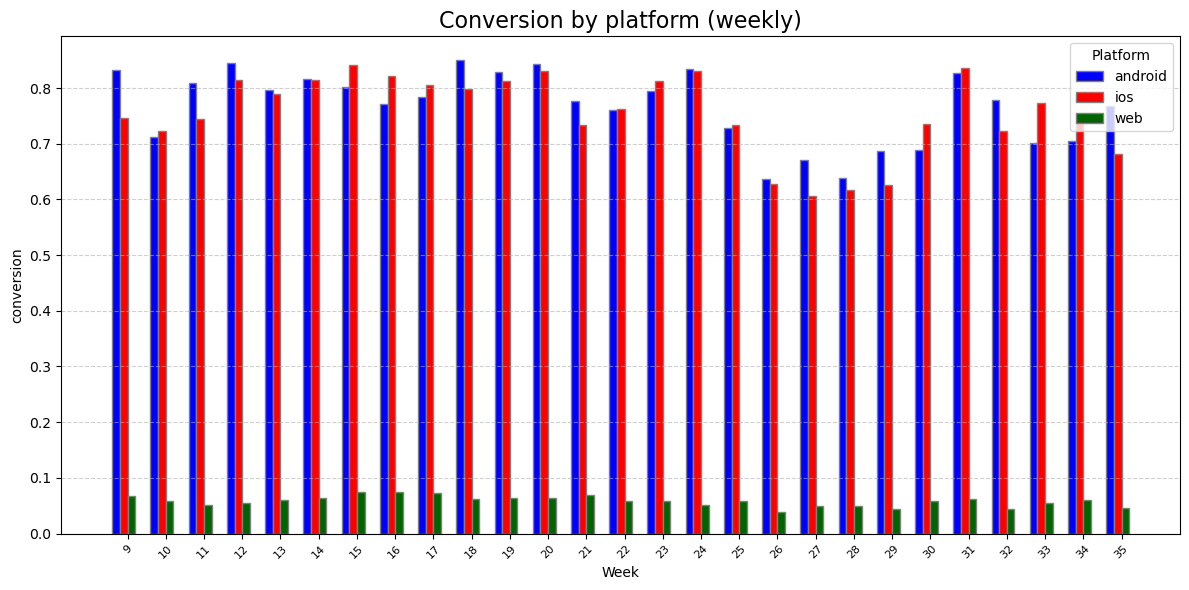

In [307]:
plot_grouped_column_by_platform(
    conversion_weekly_df,
    date_column='week',
    column_name='conversion',
    title='Conversion by platform (weekly)',
    xlabel='Week',
    save_path=f'{dir_to_save_plots}/conversion_by_platform.png'
)

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/conversions_by_platform.png


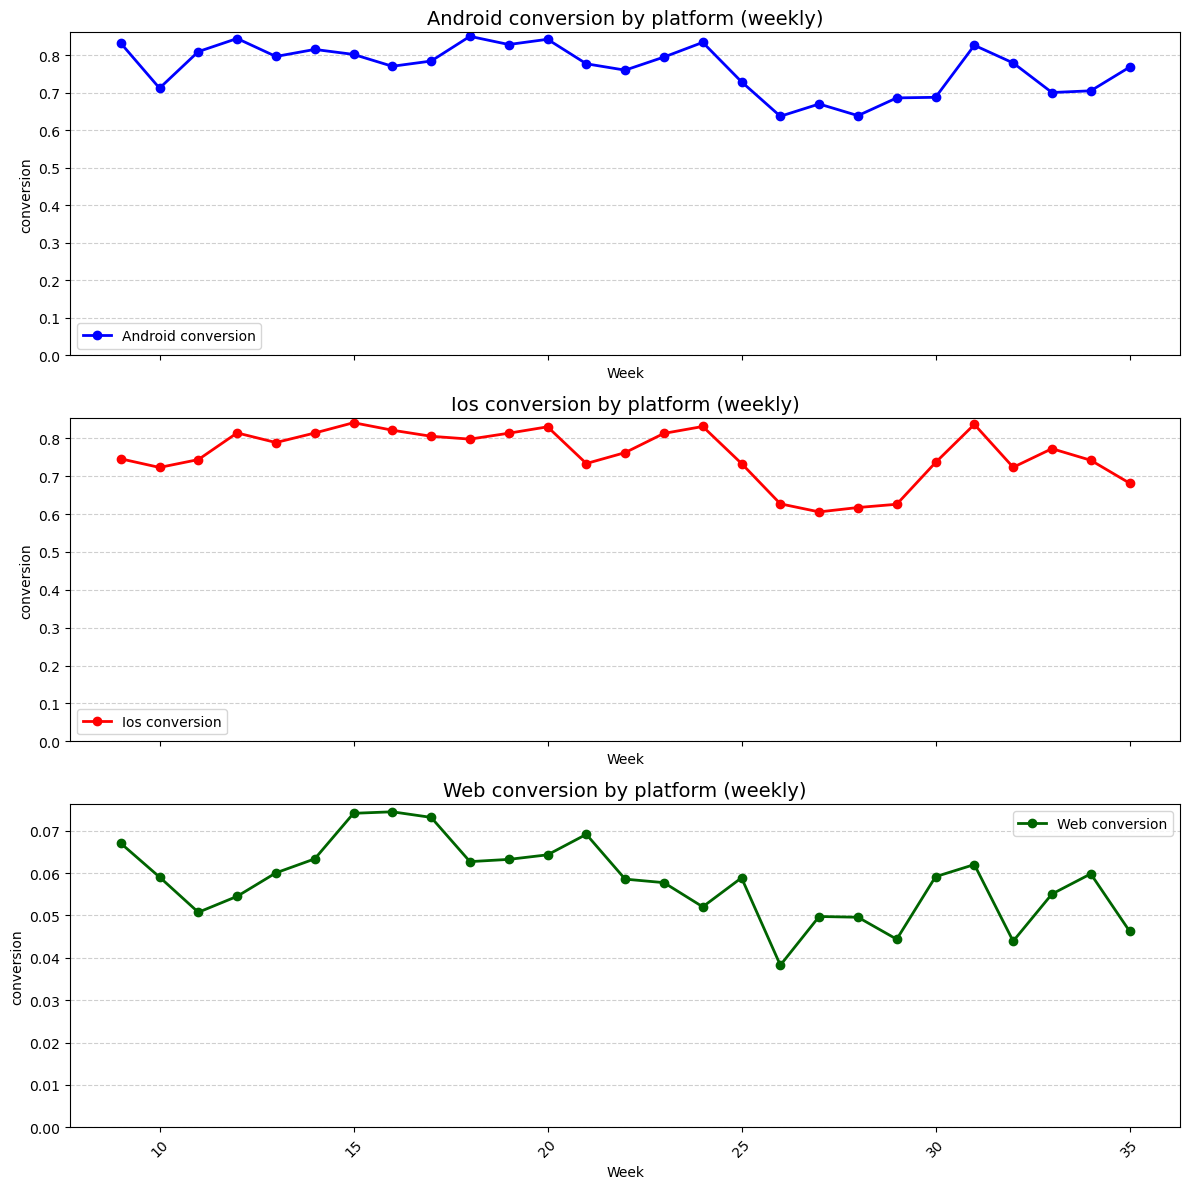

In [371]:
plot_separately_by_platform(
    conversion_weekly_df,
    date_column='week',
    column_name='conversion',
    title='conversion by platform (weekly)',
    xlabel='Week',
    ylim=0,
    save_path=f'{dir_to_save_plots}/conversions_by_platform.png'
)

### Средняя конверсия

In [321]:
conversion_weekly_df.head()

,week,platform,visits,registrations,conversion
0,9,android,328,273,0.832317
1,9,ios,177,132,0.745763
2,9,web,2521,169,0.067037
3,10,android,733,522,0.712142
4,10,ios,296,214,0.722973


In [355]:
conversion_weekly_grouped = conversion_weekly_df.groupby('week')[['visits', 'registrations']].sum().reset_index()
conversion_weekly_grouped['conversion'] = conversion_weekly_grouped['registrations'] / conversion_weekly_grouped['visits']
conversion_weekly_grouped.head()

,week,visits,registrations,conversion
0,9,3026,574,0.189689
1,10,8615,1184,0.137435
2,11,5215,829,0.158965
3,12,3950,664,0.168101
4,13,4958,856,0.172650


Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/average_conversion.png


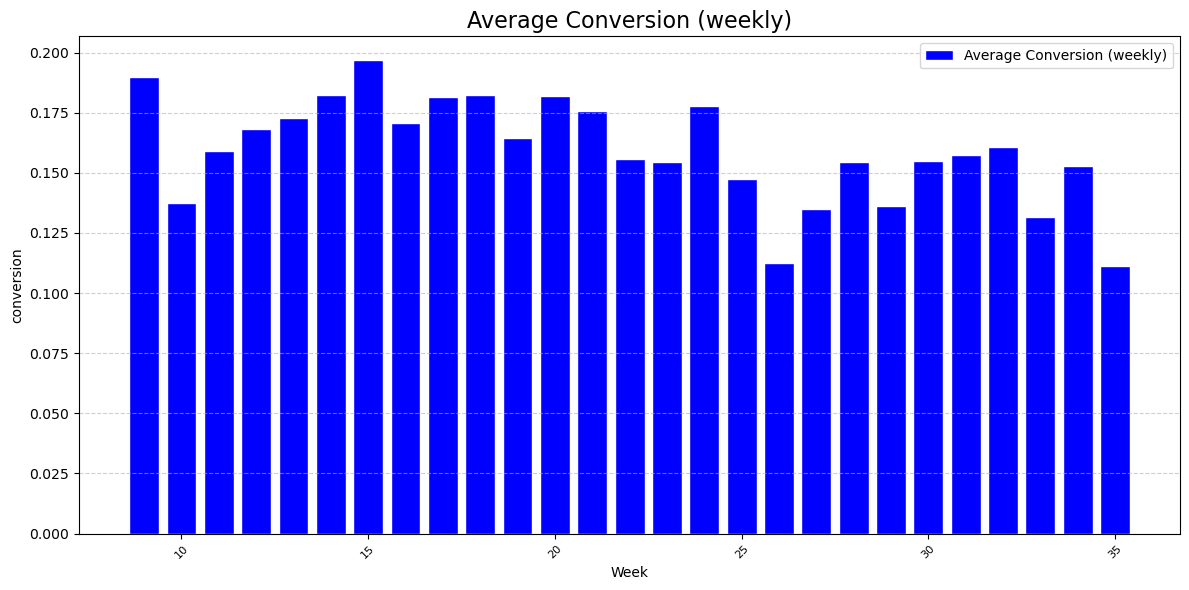

In [373]:
plot_column_data(
    conversion_weekly_grouped,
    date_column='week',
    column_name='conversion',
    title='Average Conversion (weekly)',
    xlabel='Week',
    save_path=f'{dir_to_save_plots}/average_conversion.png'
)

### Стоимости реклам

In [377]:
campaign_weekly_df.head()

,week,visits,registrations,cost,utm_campaign
0,9,3026,574,1154,advanced_algorithms_series
1,10,8615,1184,1172,advanced_algorithms_series
2,11,5215,829,498,advanced_algorithms_series
3,12,3950,664,591,none
4,13,4958,856,1287,virtual_reality_workshop


Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/campaign_costs_daily.png


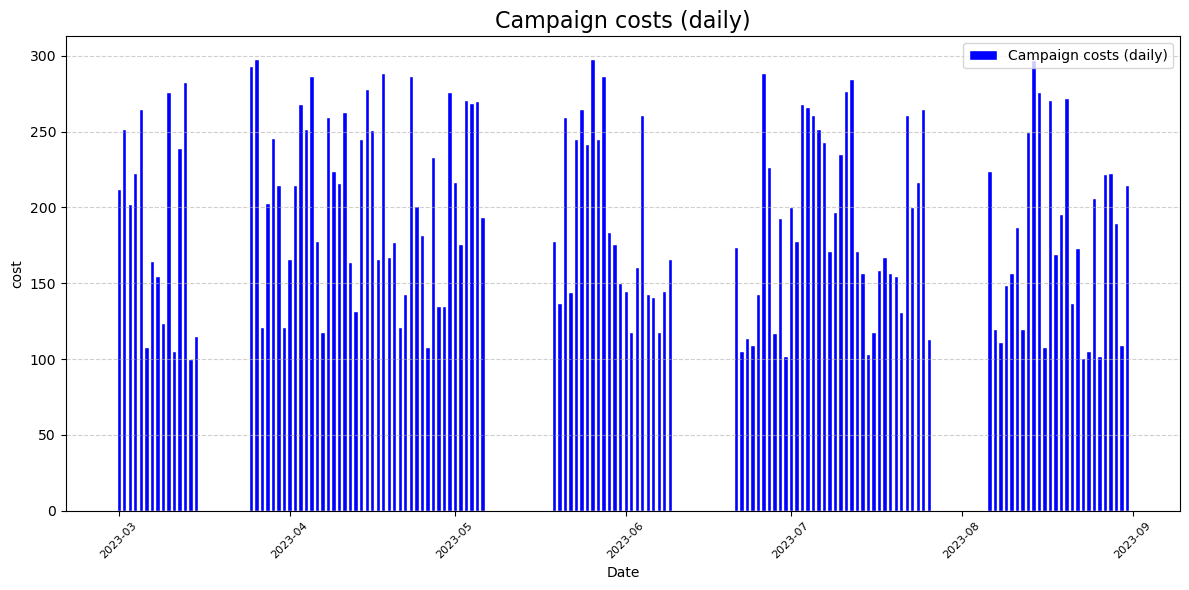

In [477]:
plot_column_data(
    campaign_summary_df,
    date_column='date_group',
    column_name='cost',
    title='Campaign costs (daily)',
    xlabel='Date',
    save_path=f'{dir_to_save_plots}/campaign_costs_daily.png'
)

Plot saved at: /home/paalso/Projects/python-for-data-analysts-project-100/charts/campaign_costs.png


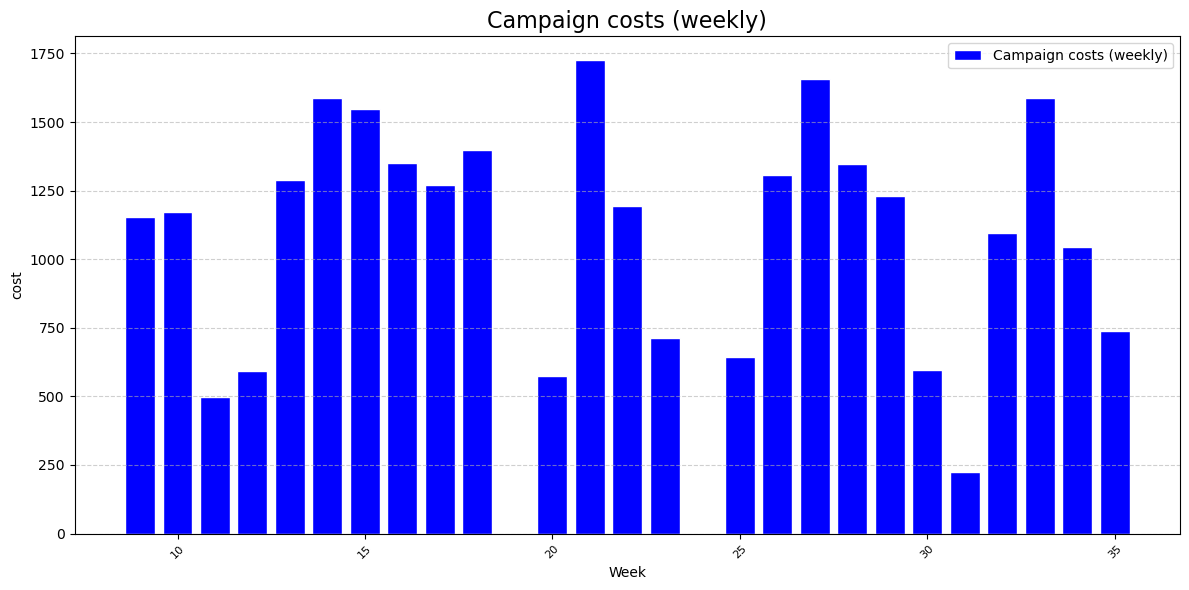

In [479]:
plot_column_data(
    campaign_weekly_df,
    date_column='week',
    column_name='cost',
    title='Campaign costs (weekly)',
    xlabel='Week',
    save_path=f'{dir_to_save_plots}/campaign_costs.png'
)